In [1]:
import cv2 as cv
import random 
import numpy as np
from matplotlib import pyplot as mlt

# Read picture

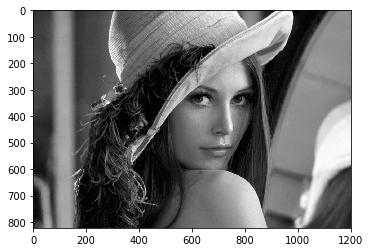

In [2]:
gray_img_single = cv.imread('/Users/snow/Documents/Picture/lenna.jpg',0)
gray_img_rgb = cv.cvtColor(gray_img_single,cv.COLOR_BGR2RGB)
mlt.imshow(gray_img_rgb)

# Show image matrix 

In [3]:
# to show image matrix
print(gray_img_single)

[[ 53  52  52 ... 144 144 144]
 [ 56  54  53 ... 144 144 144]
 [ 58  56  54 ... 144 144 144]
 ...
 [ 41  39  37 ...  31  32  32]
 [ 36  35  33 ...  31  31  31]
 [ 33  31  29 ...  31  30  30]]


In [4]:
# to show image shape
print(gray_img_single.shape)

(822, 1200)


In [5]:
col_img_bgr = cv.imread('/Users/snow/Documents/Picture/lenna.jpg')
print(col_img_bgr)
print(col_img_bgr.shape)

[[[ 14  45  84]
  [ 13  44  83]
  [ 13  43  84]
  ...
  [ 89 134 185]
  [ 89 134 185]
  [ 89 134 185]]

 [[ 17  48  87]
  [ 15  46  85]
  [ 14  44  85]
  ...
  [ 89 134 185]
  [ 89 134 185]
  [ 89 134 185]]

 [[ 19  50  89]
  [ 17  48  87]
  [ 15  45  86]
  ...
  [ 89 134 185]
  [ 89 134 185]
  [ 89 134 185]]

 ...

 [[ 23  38  54]
  [ 21  35  53]
  [ 18  33  52]
  ...
  [ 10  26  49]
  [ 11  27  50]
  [ 11  27  50]]

 [[ 20  33  47]
  [ 19  32  48]
  [ 15  29  47]
  ...
  [ 10  26  49]
  [ 10  26  49]
  [ 10  26  49]]

 [[ 15  31  44]
  [ 13  29  42]
  [ 10  26  42]
  ...
  [ 10  26  49]
  [  9  25  48]
  [  9  25  48]]]
(822, 1200, 3)


# Image crop

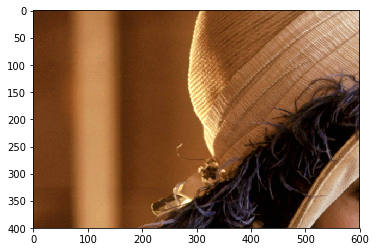

In [12]:
# image crop
col_img_rgb = cv.cvtColor(col_img_bgr,cv.COLOR_BGR2RGB)
img_crop = col_img_rgb[0:400,0:600]  # w, l
mlt.imshow(img_crop)

# Color split

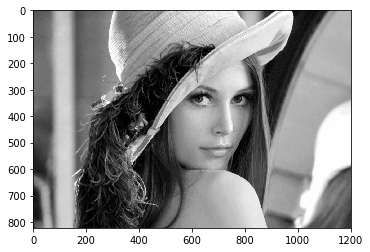

In [17]:
R,G,B = cv.split(col_img_rgb)
R_1 = cv.cvtColor(R,cv.COLOR_BGR2RGB)
G_1 = cv.cvtColor(G,cv.COLOR_BGR2RGB)
B_1 = cv.cvtColor(G,cv.COLOR_BGR2RGB)
mlt.imshow(R_1)

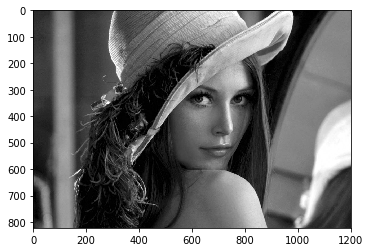

In [18]:
mlt.imshow(G_1)

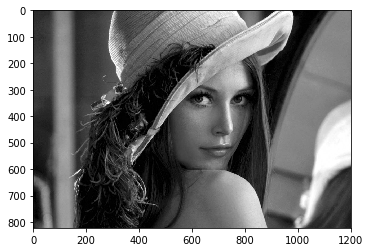

In [19]:
mlt.imshow(B_1)

# Change color randomly

In [26]:
def random_light_change(img):
    B,G,R = cv.split(col_img_bgr)
    b_rand = random.randint(-50,50)
    
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        # conform the type of the data is uint8
        B[B <= lim] = (b_rand + B[B <= lim]).astype(col_img_bgr.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(col_img_bgr.dtype)
        
    g_rand = random.randint(-50,50)
    
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(col_img_bgr.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(col_img_bgr.dtype)
        
    r_rand = random.randint(-50,50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(col_img_bgr.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(col_img_bgr.dtype)
        
    img_merge = cv.merge((B,G,R))
    return img_merge        

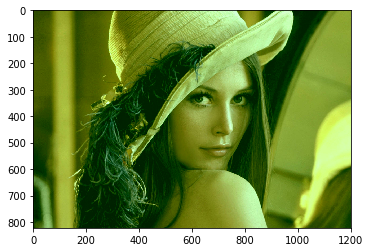

In [40]:
img = cv.imread("/Users/snow/Documents/Picture/lenna.jpg")
result_img = random_light_change(img)
result_img_rgb = cv.cvtColor(result_img,cv.COLOR_BGR2RGB)
mlt.imshow(result_img_rgb)

# Gamma correction

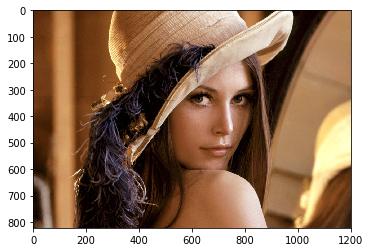

In [107]:
dark_image = cv.imread('/Users/snow/Documents/Picture/lenna.jpg')
dark_image_rgb = cv.cvtColor(ori_image,cv.COLOR_BGR2RGB)
mlt.imshow(dark_image_rgb)

In [108]:
def gamma_correction(img,gamma = 1.0):
    inv_gamma = 1.0 / gamma
    table = []
    # 不是对具体坐标像素点进行查表变换，而是对每个像素点的颜色值进行对应的查表改变，所以这里是256
    for i in range(256):
        table.append(((i / 255.0) ** inv_gamma) * 255)
    table = np.array(table).astype('uint8')
    return cv.LUT(img,table)

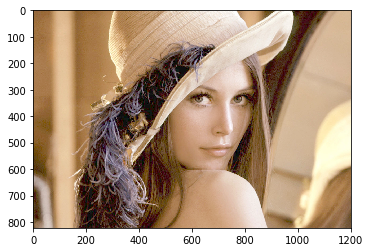

In [114]:
gamma_img = gamma_correction(dark_image,2)
gamma_img_rgb = cv.cvtColor(gamma_img,cv.COLOR_BGR2RGB)
mlt.imshow(gamma_img_rgb)

# Histogram

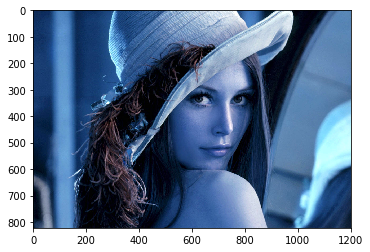

In [171]:
mlt.imshow(ori_image)
# resize 的第一个参数为长，第二个参数为宽
small_ori_image = cv.resize(ori_image,(int(ori_image.shape[1]*0.5),int(ori_image.shape[0]*0.5)))

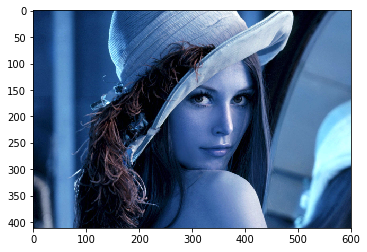

In [172]:
mlt.imshow(small_ori_image)

(array([10630., 14488., 14001.,  9596.,  7345.,  5872.,  4815.,  4547.,
         4030.,  4011.,  3948.,  4265.,  4345.,  4505.,  4517.,  4509.,
         4427.,  4619.,  4881.,  5100.,  5487.,  5608.,  5376.,  5267.,
         4975.,  4805.,  4393.,  4323.,  4116.,  3979.,  3909.,  3828.,
         3709.,  3745.,  3616.,  3704.,  3626.,  3732.,  3558.,  3259.,
         3243.,  3185.,  3198.,  3387.,  3590.,  3749.,  3574.,  3385.,
         3335.,  3105.,  3200.,  3173.,  3130.,  3221.,  3294.,  3328.,
         3620.,  3675.,  3674.,  3393.,  3255.,  3302.,  3192.,  2978.,
         2963.,  2830.,  2900.,  2972.,  2989.,  3044.,  3145.,  3050.,
         3071.,  2988.,  2998.,  2932.,  2860.,  2900.,  2896.,  2948.,
         2908.,  3024.,  3020.,  3111.,  3117.,  3301.,  3665.,  3731.,
         4134.,  4402.,  4247.,  4489.,  4136.,  4289.,  4377.,  4386.,
         4033.,  3706.,  3527.,  3437.,  3395.,  3297.,  3045.,  2894.,
         2903.,  2750.,  2666.,  2662.,  2693.,  2760.,  2872., 

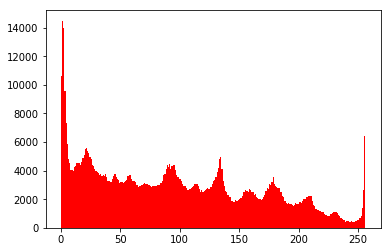

In [173]:
mlt.hist(small_ori_image.flatten(),256,[0,256],color='r')

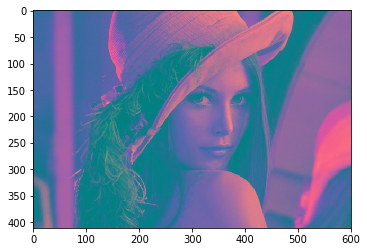

In [185]:
yuv_image = cv.cvtColor(small_ori_image,cv.COLOR_BGR2YUV)
mlt.imshow(yuv_image)
# 对其中一个通道进行直方图归一化
yuv_image[:,:,0] = cv.equalizeHist(yuv_image[:,:,0])

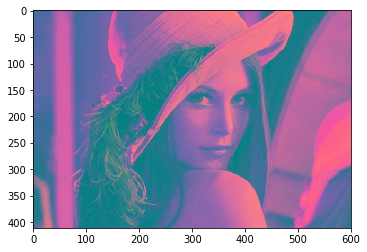

In [186]:
mlt.imshow(yuv_image)

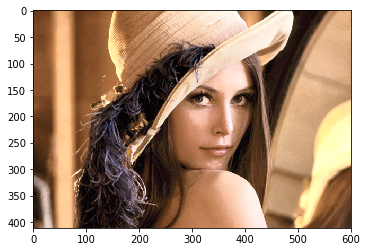

In [189]:
output_image = cv.cvtColor(yuv_image,cv.COLOR_YUV2BGR)
output_image_rgb = cv.cvtColor(output_image,cv.COLOR_BGR2RGB)
mlt.imshow(output_image_rgb)

# Rotation

In [240]:
# center, angle, scale  获得旋转矩阵
M = cv.getRotationMatrix2D((output_image_rgb.shape[1] / 2, output_image.shape[0] / 2), 30, 2)

In [241]:
# 仿射变换   --->  线性变换 + 平移
img_rotate = cv.warpAffine(output_image_rgb,M,(output_image.shape[1],output_image.shape[0]))

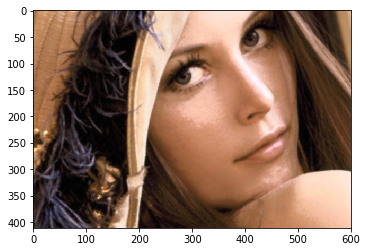

In [242]:
mlt.imshow(img_rotate)

In [244]:
M

array([[   1.73205081,    1.        , -425.11524227],
       [  -1.        ,    1.73205081,  149.56355904]])

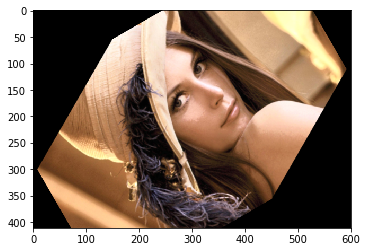

In [210]:
img_rotate2 = cv.warpAffine(img_rotate,M,(img_rotate.shape[1],img_rotate.shape[0]))
mlt.imshow(img_rotate2)

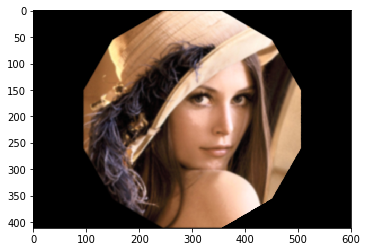

In [221]:
img_rotate2 = cv.warpAffine(img_rotate2,M,(img_rotate.shape[1],img_rotate.shape[0]))
mlt.imshow(img_rotate2)

# Affine transform

In [247]:
rows,cols,ch = output_image_rgb.shape()

TypeError: 'tuple' object is not callable

In [249]:
output_image_rgb.shape

(411, 600, 3)

In [250]:
pts1 = np.float32([[0, 0],[rows - 1, 0],[0, cols - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1],[cols * 0.9, rows * 0.2],[cols * 0.1, rows * 0.9]])

In [251]:
M = cv.getAffineTransform(pts1, pts2)

In [252]:
dst = cv.warpAffine(output_image_rgb, M, (cols,rows))

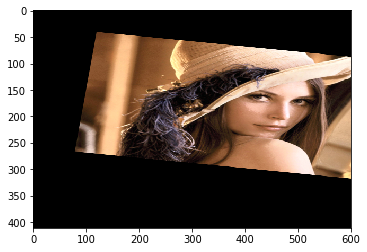

In [253]:
mlt.imshow(dst)

In [257]:
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv.getPerspectiveTransform(pts1, pts2)
    img_warp = cv.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

In [258]:
M_warp, img_warp = random_warp(gamma_img_rgb, img.shape[0], img.shape[1])

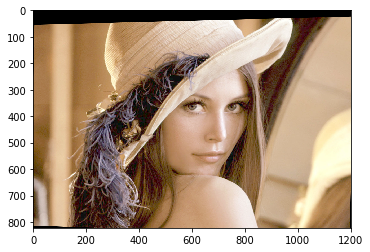

In [259]:
mlt.imshow(img_warp)

In [260]:
M_warp

array([[ 9.18842816e-01, -1.96917066e-02,  5.24006056e+00],
       [-2.77976157e-02,  9.24260990e-01,  5.55093006e+01],
       [-7.46337670e-05,  4.22042436e-06,  1.00000000e+00]])